In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('D:\Invistico_Airline.csv')
print(df.head(10))

  satisfaction   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Loyal Customer   65  Personal Travel       Eco   
1    satisfied  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Loyal Customer   70  Personal Travel       Eco   
5    satisfied  Loyal Customer   30  Personal Travel       Eco   
6    satisfied  Loyal Customer   66  Personal Travel       Eco   
7    satisfied  Loyal Customer   10  Personal Travel       Eco   
8    satisfied  Loyal Customer   56  Personal Travel  Business   
9    satisfied  Loyal Customer   22  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                            

# DATA CLEANING

##### Rename the column

In [2]:
df.rename(columns={'satisfaction': 'Satisfaction'}, inplace=True)

##### Replace values

In [3]:
for x in df.index:
  if df.loc[x, "Satisfaction"] == "satisfied":
    df.loc[x, "Satisfaction"] = "Yes"
  else:
    df.loc[x, "Satisfaction"] = "No"

In [4]:
df["Customer Type"] = df["Customer Type"].str.replace('Customer', '')

In [5]:
df["Type of Travel"] = df["Type of Travel"].str.replace('Travel', '')
print(df.head(10))

  Satisfaction Customer Type  Age Type of Travel     Class  Flight Distance  \
0          Yes        Loyal    65      Personal        Eco              265   
1          Yes        Loyal    47      Personal   Business             2464   
2          Yes        Loyal    15      Personal        Eco             2138   
3          Yes        Loyal    60      Personal        Eco              623   
4          Yes        Loyal    70      Personal        Eco              354   
5          Yes        Loyal    30      Personal        Eco             1894   
6          Yes        Loyal    66      Personal        Eco              227   
7          Yes        Loyal    10      Personal        Eco             1812   
8          Yes        Loyal    56      Personal   Business               73   
9          Yes        Loyal    22      Personal        Eco             1556   

   Seat comfort  Departure/Arrival time convenient  Food and drink  \
0             0                                  0          

# DATA VISUALIZATION

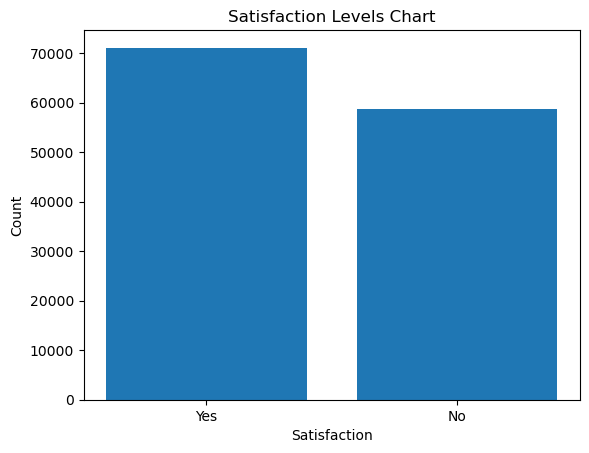

In [6]:
satisfaction_counts = df['Satisfaction'].value_counts()
plt.bar(satisfaction_counts.index, satisfaction_counts.values)
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.title('Satisfaction Levels Chart')
plt.show()

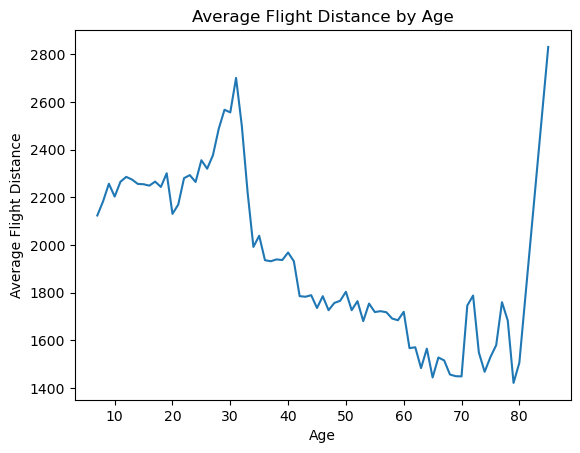

In [7]:
average_flight_distance = df.groupby('Age')['Flight Distance'].mean()
plt.plot(average_flight_distance.index, average_flight_distance)
plt.xlabel('Age')
plt.ylabel('Average Flight Distance')
plt.title('Average Flight Distance by Age')
plt.show()

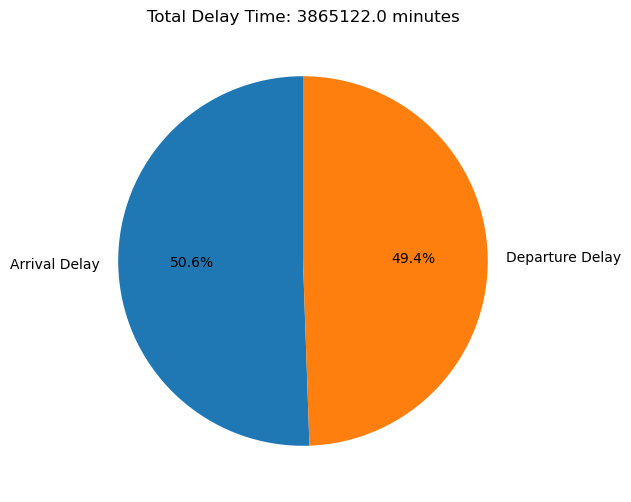

In [8]:
total_delay = df['Arrival Delay in Minutes'].sum() + df['Departure Delay in Minutes'].sum()
delay_data = {'Arrival Delay': df['Arrival Delay in Minutes'].sum(), 'Departure Delay': df['Departure Delay in Minutes'].sum()}
plt.figure(figsize=(6, 6))
plt.pie(delay_data.values(), labels=delay_data.keys(), autopct='%1.1f%%' , startangle = 90)
plt.title(f'Total Delay Time: {total_delay} minutes')
plt.show()